<a href="https://colab.research.google.com/github/NatashaSikinyi/MchezopesaLtd/blob/main/Moringa_Data_Science_Core_Module_II_Week_6_Regression_Natasha_Sikinyi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MchezopesaLtd Football Ananlysis**

## **Defining the Question**
### **Problem Statement**:

Building a model to predict result of a game between team 1 and team 2 based on whose home and whose away, and whether or not the game is frirendly and who will win, lose or draw.

### **Metric for Success**:

Performed EDA 
Building Regression Models
Performing cross validation, residual scores, RMSE score and heteroscedasity

### **Context**:

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

### **Experimental Design**:

Define the question
Perform EDA
Check of multicollinearity
Building the model
Cross-validate the model
Compute RMSE
Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test

### **Appropriatness of available data**:

Data provided is appropriate and up to date


# **Importing Libraries**

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# **Loading Data**

In [2]:
#loading the Fifa Ranking dataset

rank = pd.read_csv('/content/fifa_ranking.csv')

#checking the top entries

rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [3]:
#checking the bottom entries

rank.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [4]:
#checking the datatype

rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [15]:
#checking number of records

rank.shape[0]

57793

In [16]:
rank.shape[1]

16

In [17]:
#loading the Results dataset

results = pd.read_csv('/content/results.csv')

#checking top five entries

results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [18]:
#checking bottom 5 entries

results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [20]:
#checking datatype

results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [21]:
#checking no of recors

results.shape[0]

40839

In [22]:
results.shape[1]

9

# **Data Cleaning**

In [23]:
#checking for duplicates in ranking dataset
duplicate = rank[rank.duplicated()]

duplicate.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
41320,113,Sudan,SDN,297.13,304,-1,126.55,126.55,219.72,109.86,67.36,20.21,202.53,40.51,CAF,2011-12-21
41536,120,Sudan,SDN,264.81,297,-7,129.14,129.14,163.12,81.56,40.91,12.27,209.21,41.84,CAF,2012-01-18
41736,111,Sudan,SDN,301.67,265,9,156.34,156.34,163.12,81.56,40.91,12.27,257.48,51.50,CAF,2012-02-15
41944,110,Sudan,SDN,299.75,302,1,156.34,156.34,163.12,81.56,46.75,14.03,239.09,47.82,CAF,2012-03-07
42157,113,Sudan,SDN,292.03,300,-3,149.12,149.12,180.83,90.42,0.00,0.00,262.47,52.49,CAF,2012-04-11


In [24]:
#dropping duplicates in ranking dataset

rank.drop_duplicates(inplace=True)

In [26]:
#checking if ranking duplicates have been dropped

rank.duplicated().sum()

0

In [74]:
#checking for duplicates in results dataset
duplicate = results[results.duplicated()]

duplicate

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month


In [76]:
#change the rank_date column to datetype in ranking dataset

rank['rank_date'] = pd.to_datetime(rank['rank_date'])

#separate year and month
rank['year'] = rank.rank_date.dt.year
rank['month'] = rank.rank_date.dt.month

In [77]:
#change the rank_date column to datetype in results dataset

results['date'] = pd.to_datetime(results['date'])

#creating a year and month column from the datetime object
results['year'] = results.date.dt.year
results['month'] = results.date.dt.month

In [75]:
#filterig data to get games played after August 8th 1993

results = results.loc[(results['date'] >= '1993-08-08')]               
results.head(2)

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month
17915,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,1993,8
17916,1993-08-08,Brazil,Mexico,1,1,Friendly,False,1993,8


In [43]:
#checking number of rows and columns
results.shape

(22924, 9)

In [44]:
#merging the two datasets to obtain the home_team rank dataset : home_team, year and month
home_df = pd.merge(results, rank, left_on=['home_team','year','month'], right_on=['country_full','year','month'], how = 'inner')

#renaming rank to home team rank
home_df = home_df.rename({'rank': 'home_rank'}, axis = 1)
home_df.head(2)

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,home_rank,country_full,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,1993,8,59,Bolivia,1993-08-08
1,1993-08-15,Bolivia,Ecuador,1,0,FIFA World Cup qualification,False,1993,8,59,Bolivia,1993-08-08


In [45]:
#checking how many rows and columns in the merged dataset

home_df.shape

(18588, 12)

In [46]:
#merging the two datasets to obtain the away_team rank dataset

away_df = pd.merge(results, rank, left_on=['away_team','year','month'], right_on=['country_full','year','month'], how = 'inner')

#renaming the rank column to obtaing the away_team_rank

away_df = away_df.rename({'rank': 'away_rank'}, axis = 1)
away_df.head(2)

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,away_rank,country_full,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,1993,8,22,Uruguay,1993-08-08
1,1993-08-08,Brazil,Mexico,1,1,Friendly,False,1993,8,14,Mexico,1993-08-08


In [47]:
#checking how many rows and columns in the merged dataset
away_df.shape

(18497, 12)

In [48]:
#merging home df and away df 
model_df = pd.concat([home_df, away_df], axis=1, join = 'inner')

model_df

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,home_rank,...,away_team,home_score,away_score,tournament,neutral,year,month,away_rank,country_full,rank_date
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,1993,8,59,...,Uruguay,3,1,FIFA World Cup qualification,False,1993,8,22,Uruguay,1993-08-08
1,1993-08-15,Bolivia,Ecuador,1,0,FIFA World Cup qualification,False,1993,8,59,...,Mexico,1,1,Friendly,False,1993,8,14,Mexico,1993-08-08
2,1993-08-22,Bolivia,Venezuela,7,0,FIFA World Cup qualification,False,1993,8,59,...,Venezuela,5,0,FIFA World Cup qualification,False,1993,8,94,Venezuela,1993-08-08
3,1993-08-08,Brazil,Mexico,1,1,Friendly,False,1993,8,8,...,Venezuela,7,0,FIFA World Cup qualification,False,1993,8,94,Venezuela,1993-08-08
4,1993-08-22,Brazil,Ecuador,2,0,FIFA World Cup qualification,False,1993,8,8,...,Venezuela,4,0,FIFA World Cup qualification,False,1993,8,94,Venezuela,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18492,2018-06-27,Mexico,Sweden,0,3,FIFA World Cup,True,2018,6,15,...,France,0,0,FIFA World Cup,True,2018,6,7,France,2018-06-07
18493,2018-06-02,Sweden,Denmark,0,0,Friendly,False,2018,6,24,...,Argentina,1,2,FIFA World Cup,True,2018,6,5,Argentina,2018-06-07
18494,2018-06-09,Sweden,Peru,0,0,Friendly,False,2018,6,24,...,Argentina,4,3,FIFA World Cup,True,2018,6,5,Argentina,2018-06-07
18495,2018-06-18,Sweden,South Korea,1,0,FIFA World Cup,True,2018,6,24,...,Poland,0,1,FIFA World Cup,True,2018,6,8,Poland,2018-06-07


In [49]:
#droping duplicated columns
model_df = model_df.loc[:,~model_df.columns.duplicated()]

model_df.head(2)

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,home_rank,country_full,rank_date,away_rank
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False,1993,8,59,Bolivia,1993-08-08,22
1,1993-08-15,Bolivia,Ecuador,1,0,FIFA World Cup qualification,False,1993,8,59,Bolivia,1993-08-08,14


In [53]:
#checking for duplicates in the dataset
model_df.duplicated().sum()

6

In [54]:
#droping duplicates in ranking dataset
model_df.drop_duplicates(inplace=True)

In [55]:
#determining whether result is a win, lose or draw 

model_df['outcome'] = model_df['home_score'] - model_df['away_score']

def outcome(goals):
  if goals > 0:
    return 'Win'
  elif goals < 0:
    return 'Lose'
  else:
    return 'Draw'

model_df['outcome'] = model_df.outcome.apply(lambda x: outcome(x))

model_df.head(5)

,home_team,away_team,home_score,away_score,tournament,year,month,home_rank,away_rank,outcome
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,1993,8,59,22,Win
1,Bolivia,Ecuador,1,0,FIFA World Cup qualification,1993,8,59,14,Win


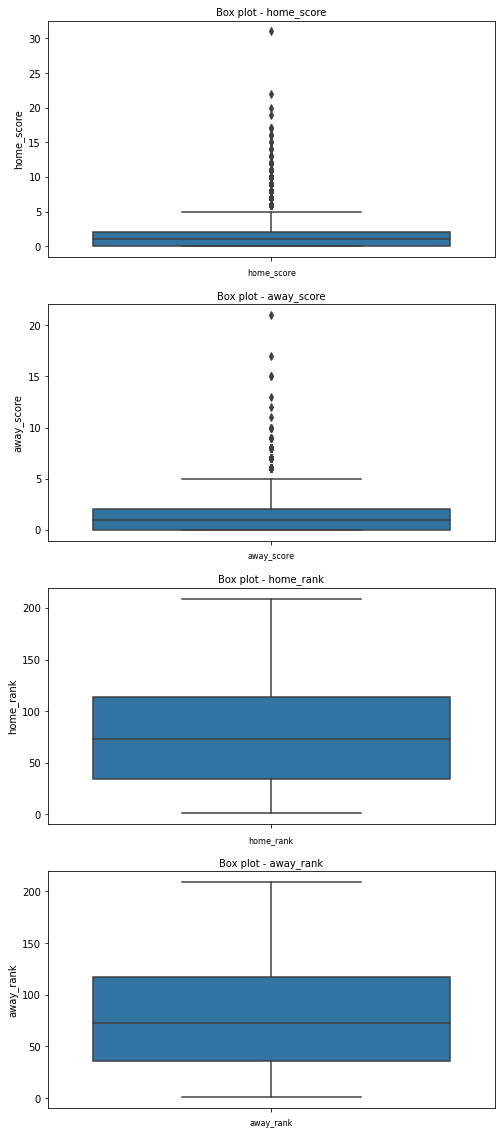

In [56]:
#checking for outliers

col_names = ['home_score','away_score', 'home_rank', 'away_rank']

fig, ax = plt.subplots(len(col_names), figsize= (8,20))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = model_df[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

In [ ]:
#

# **Exploratory Data Analysis**

In [57]:
# Univariate Ananlysis

num_attributes = model_df.select_dtypes( include=['int64', 'float64'] )
cat_attributes = model_df.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

In [58]:
model_df.head()

,home_team,away_team,home_score,away_score,tournament,year,month,home_rank,away_rank,outcome
0,Bolivia,Uruguay,3,1,FIFA World Cup qualification,1993,8,59,22,Win
1,Bolivia,Ecuador,1,0,FIFA World Cup qualification,1993,8,59,14,Win
2,Bolivia,Venezuela,7,0,FIFA World Cup qualification,1993,8,59,94,Win
3,Brazil,Mexico,1,1,Friendly,1993,8,8,94,Draw
4,Brazil,Ecuador,2,0,FIFA World Cup qualification,1993,8,8,94,Win


In [59]:
#getting the univariate describe summary

num_attributes.describe()

,home_score,away_score,year,month,home_rank,away_rank
count,18491.000000,18491.000000,18491.000000,18491.000000,18491.000000,18491.000000
mean,1.624845,1.074415,2006.408739,6.892921,77.950787,79.812936
std,1.662173,1.262549,6.782668,3.293174,51.265149,52.227704
min,0.000000,0.000000,1993.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,2001.000000,4.000000,34.000000,36.000000
50%,1.000000,1.000000,2007.000000,7.000000,73.000000,73.000000
75%,2.000000,2.000000,2012.000000,10.000000,114.000000,117.000000
max,31.000000,21.000000,2018.000000,12.000000,209.000000,209.000000


In [85]:
#std, var, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( np.var ) ).T
d3 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

#concatenate
m = pd.concat( [d2, d3, d1, d4, d5] ).T.reset_index()
m.columns = ( ['columns', 'variance', 'range', 'std', 'skew', 'kurtosis'])
m

,columns,variance,range,std,skew,kurtosis
0,home_score,2.762671,31.0,1.662128,2.403958,14.928949
1,away_score,1.593943,21.0,1.262515,2.181706,11.375388
2,year,46.002095,25.0,6.782484,-0.117038,-1.095483
3,month,10.844410,11.0,3.293085,-0.215026,-1.175653
4,home_rank,2627.973350,208.0,51.263763,0.408922,-0.746489
5,away_rank,2727.585525,208.0,52.226292,0.434433,-0.726062


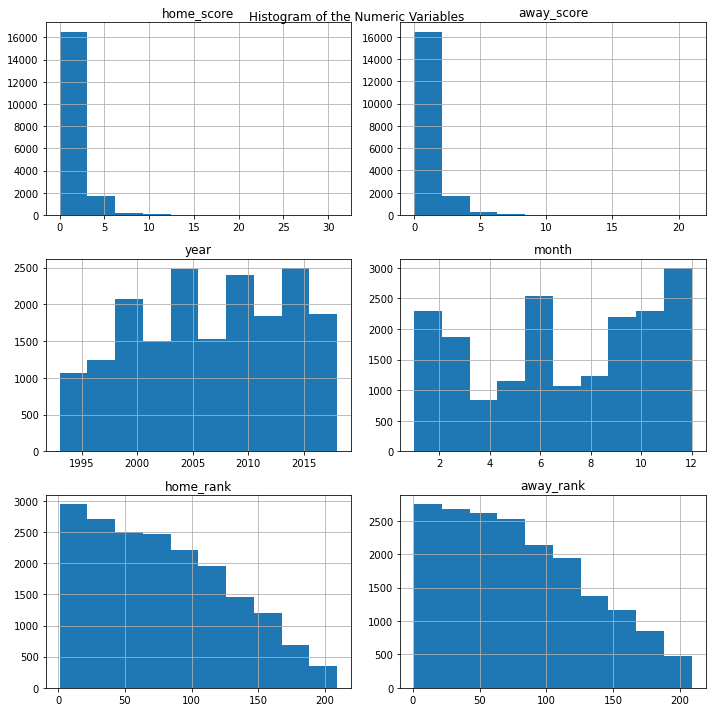

In [79]:
#plotting the numerical variables on histogram 

model_df.hist(bins=10, figsize=(10,10))
plt.suptitle("Histogram of the Numeric Variables")
plt.savefig('Fifa Histogram')
plt.show()

In [63]:
cat_attributes.head(5)

,home_team,away_team,tournament,outcome
0,Bolivia,Uruguay,FIFA World Cup qualification,Win
1,Bolivia,Ecuador,FIFA World Cup qualification,Win
2,Bolivia,Venezuela,FIFA World Cup qualification,Win
3,Brazil,Mexico,Friendly,Draw
4,Brazil,Ecuador,FIFA World Cup qualification,Win


In [66]:
cat_attributes['tournament'].value_counts()

Friendly                                6964
FIFA World Cup qualification            4260
UEFA Euro qualification                 1423
African Cup of Nations qualification     955
AFC Asian Cup qualification              426
                                        ... 
Dragon Cup                                 4
Intercontinental Cup                       4
SKN Football Festival                      3
Copa América qualification                 2
ELF Cup                                    1
Name: tournament, Length: 67, dtype: int64

In [64]:
cat_attributes['home_team'].value_counts()

Mexico                      273
Japan                       233
Saudi Arabia                225
Qatar                       208
Oman                        205
                           ... 
Montserrat                    9
Chinese Taipei                9
Kosovo                        8
Gibraltar                     6
Turks and Caicos Islands      5
Name: home_team, Length: 193, dtype: int64

In [65]:
cat_attributes['away_team'].value_counts()

Zambia              189
Sweden              160
Paraguay            159
Finland             157
Brazil              156
                   ... 
Tibet                 1
Vatican City          1
Falkland Islands      1
Frøya                 1
Western Isles         1
Name: away_team, Length: 234, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


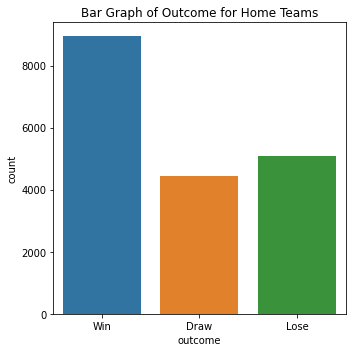

In [78]:
#countplots
plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True

sns.countplot(cat_attributes.outcome, x='outcome')
plt.title('Bar Graph of Outcome for Home Teams')

plt.show()

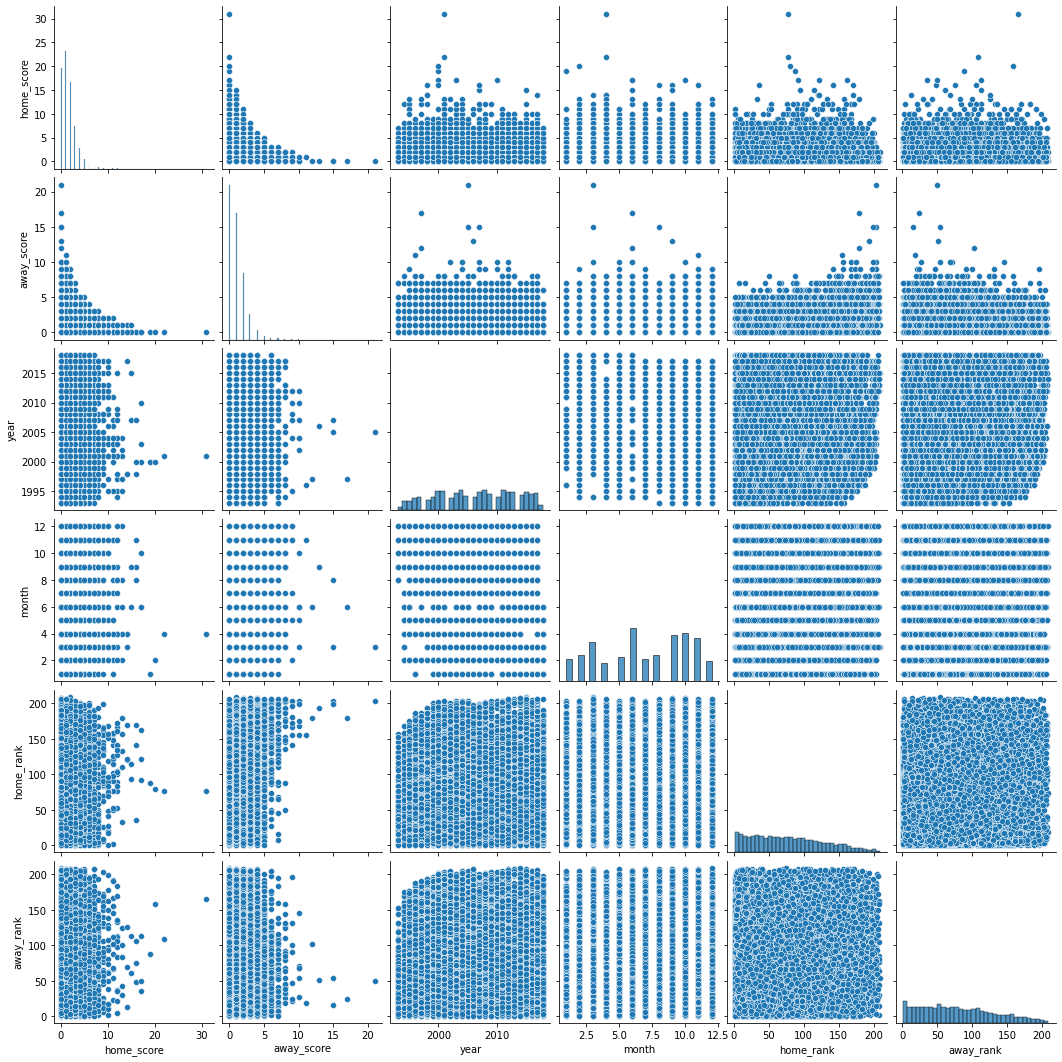

In [68]:
# Bivariate Ananlysis

sns.pairplot(num_attributes)
plt.show()

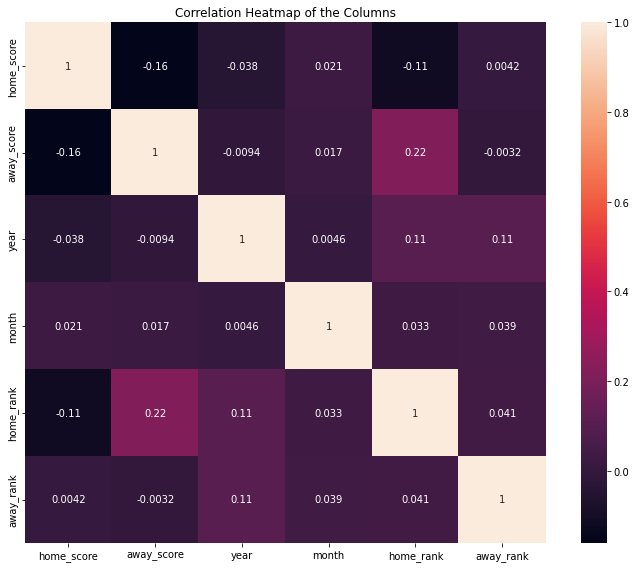

In [83]:
#plotting correlation heat map

plt.figure(figsize=(10,8))
sns.heatmap(num_attributes.corr(),square=True,annot=True);
plt.title('Correlation Heatmap of the Columns')

plt.show()

In [70]:
model_df1 = model_df.copy()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

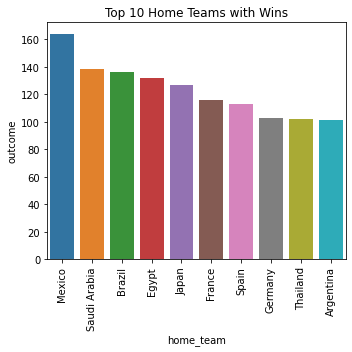

In [88]:
#calculating top 10 teams with home wins

wins = model_df1[model_df1['outcome'] == 'Win']
group = wins.groupby(['home_team'])['outcome'].count().nlargest(10)
group = group.reset_index()

#creating a bar plot by group

sns.barplot(x='home_team',y='outcome',data=group)
plt.title('Top 10 Home Teams with Wins')
plt.xticks(rotation=90)

Mexico has more wins over the years

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

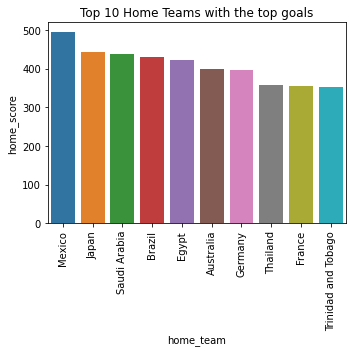

In [91]:
#calculating top 10 home teams with the top goals scored

group1 = model_df1.groupby(['home_team'])['home_score'].sum().nlargest(10)
group1 = group1.reset_index()

#create bar plot by group

sns.barplot(x='home_team',y='home_score',data=group1)
plt.title('Top 10 Home Teams with the top goals')
plt.xticks(rotation=90)

Mexico has scored the most goals when they are home team

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

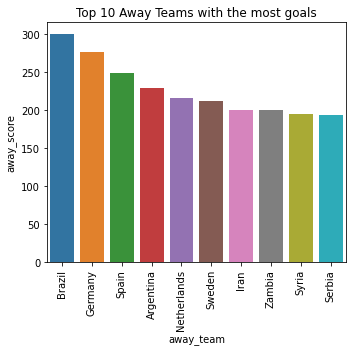

In [89]:
#calculating top 10 away teams with the most goals

group2 = model_df1.groupby(['away_team'])['away_score'].sum().nlargest(10)
group2 = group2.reset_index()

# #create bar plot by group
sns.barplot(x='away_team',y='away_score',data=group2)
plt.title('Top 10 Away Teams with the most goals')
plt.xticks(rotation=90)

Brazil has scored the most goals when they are the away team

# **Polynomial Regression**

In [92]:
#creating a new column for tournament type

def tournament_group(i):
  if i == 'FIFA World Cup':
    return 'FIFA World Cup'
  if i == 'Friendly':
    return 'Friendly'
  else:
    return 'Other'

model_df['tournament_X'] = model_df.tournament.apply(lambda x: tournament_group(x))
model_df['tournament_X'] .head(2)

0    Other
1    Other
Name: tournament_X, dtype: object

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


#setting the independent varriables
var = model_df[['away_score', 'home_rank', 'away_rank']]
  
#the VIF dataframe
vif_df = pd.DataFrame()
vif_df["feature"] = var.columns
  
#calculating VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(var.values, i)
                          for i in range(len(var.columns))]
  
print(vif_df)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


      feature       VIF
0  away_score  1.714808
1   home_rank  2.455691
2   away_rank  2.082770


## **Home Team Prediction**

In [94]:
#separating dataset into features and labels

X = model_df[['tournament_X', 'home_rank', 'away_rank']]
y = model_df['home_score']

X = pd.get_dummies(X)
home_model_df = X.copy()

In [100]:
#splitting the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [102]:
#creating the model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

#standardising the X_train and the X_test to the same scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#model Selection
model = PolynomialFeatures(degree = 2)

#fitting the model
X_train1 = model.fit_transform(X_train)
X_test1 = model.fit_transform(X_test)

#performing Linear Regression
Reg = LinearRegression()

#fitting tthe X and y:
Reg.fit(X_train, y_train)
y_pred = Reg.predict(X_test)

In [103]:
#model evaluation

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-Squared:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 1.1867378388235066
Mean Squared Error: 2.672555731151161
Root Mean Squared Error: 1.634795317815402
R-Squared: 0.01908181083571392


using 2 degrees we get an r squared of 0.019

In [105]:
# Heteroskedasticity test

#import scipy
import scipy as sp

#creating residule by subtracting test value from predicted value 
residuals = np.subtract(y_pred, y_test)

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

#computing critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)


if (test_result > critical_value):
  print('The variances are unequal')
else:
  print('The Variances are Homogeneous')

The Variances are Homogeneous


In [107]:
# Cross Validation

from sklearn.model_selection import KFold

X = home_model_df.values
y = model_df['home_score'].values

folds = KFold(n_splits=10)

#printing the number of folds to be used
print('Using ' +str(folds.get_n_splits(X)) + ' folds')

#creating and assessing the 10 models based on the folds created
RMSES = []
count = 1  
for train_index, test_index in folds.split(X):
  print('\nTraining Model ' + str(count))

#set up the train and test based on the split determined by KFold

#with 10 folds we end up with 90% of our data in the training set and 10% in the test set
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

#fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)

#assess the accuraccy of the model
  y_pred = regressor.predict(X_test)

  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)

  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

Using 10 folds

Training Model 1
Model 1 Root Mean Squared Error: 1.5641209463528323

Training Model 2
Model 2 Root Mean Squared Error: 1.858813968862313

Training Model 3
Model 3 Root Mean Squared Error: 1.9735033363990282

Training Model 4
Model 4 Root Mean Squared Error: 1.706190302318361

Training Model 5
Model 5 Root Mean Squared Error: 1.5684084887204752

Training Model 6
Model 6 Root Mean Squared Error: 1.5963725788391565

Training Model 7
Model 7 Root Mean Squared Error: 1.5738618651908922

Training Model 8
Model 8 Root Mean Squared Error: 1.5317628161139554

Training Model 9
Model 9 Root Mean Squared Error: 1.4751485520965022

Training Model 10
Model 10 Root Mean Squared Error: 1.5643255533806428


There is no significant changes between the folds

In [109]:
#mean of RMSES
np.mean(RMSES)

1.641250840827416

## **Away Team Prediction**

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#independent variables set
var = model_df[['home_score', 'home_rank', 'away_rank']]
  
#VIF dataframe
vif_df = pd.DataFrame()
vif_df["feature"] = var.columns
  
#calculating VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(var.values, i)
                          for i in range(len(var.columns))]
  
print(vif_df)

      feature       VIF
0  home_score  1.599064
1   home_rank  2.123464
2   away_rank  2.292879


In [111]:
#separating the dataset to features and labels

X = model_df[['tournament_X', 'home_rank', 'away_rank']]
y = model_df['away_score']

X = pd.get_dummies(X)
away_model_df = X.copy()

In [118]:
#splitting the data
 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [119]:
#creating the model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#model Selection:
model = PolynomialFeatures(degree = 3)

#standardising the X_train and the X_test to the same scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#fitting the model:
X_train = model.fit_transform(X_train)
X_test = model.fit_transform(X_test)

#performing Linear Regression:
Reg = LinearRegression()

#fitting X and y:
Reg.fit(X_train, y_train)

y_pred = Reg.predict(X_test)

In [120]:
#evaluating Model
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-Squared:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.8912906965594027
Mean Squared Error: 1.5108025439448256
Root Mean Squared Error: 1.229147079866696
R-Squared: 0.07466447656824404


In [122]:
# Heteroskedasticity Test

#import scipy
import scipy as sp

#creating residule by subtracting test value from predicted value
residuals = np.subtract(y_pred, y_test)

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

#computing critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

if (test_result > critical_value):
  print('Variances are unequal')
else:
  print('Variances are homogeneous')

Variances are homogeneous


In [123]:
# Cross Validation

from sklearn.model_selection import KFold

X = away_model_df.values
y = model_df['away_score'].values

folds = KFold(n_splits=10)

#printing the number of folds we will use
print('Using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 10 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1  # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining Model ' + str(count))

# set up the train and test based on the split determined by KFold
# With 10 folds, we will end up with 80% of our data in the training set, and 20% in the test set
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1


Using 10 folds

Training Model 1
Model 1 Root Mean Squared Error: 1.2589443940956015

Training Model 2
Model 2 Root Mean Squared Error: 1.2545491679236158

Training Model 3
Model 3 Root Mean Squared Error: 1.2688198213761288

Training Model 4
Model 4 Root Mean Squared Error: 1.2136727597484096

Training Model 5
Model 5 Root Mean Squared Error: 1.3114452582091696

Training Model 6
Model 6 Root Mean Squared Error: 1.235890700549361

Training Model 7
Model 7 Root Mean Squared Error: 1.1706444489262062

Training Model 8
Model 8 Root Mean Squared Error: 1.2208764215316963

Training Model 9
Model 9 Root Mean Squared Error: 1.2017418202790333

Training Model 10
Model 10 Root Mean Squared Error: 1.174732431878427


There is no significant difference between the folds

In [124]:
#mean of RMSES
np.mean(RMSES)

1.231131722451765

# **Logistic Regression**

In [138]:
#using home rank, away rank and tournament types to predict
#if a game is win, lose or draw for home team

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df_logistic = model_df.copy()

df_logistic['home_team'] = label_encoder.fit_transform (df_logistic['home_team'])
df_logistic['away_team'] = label_encoder.fit_transform (df_logistic['away_team'])



In [202]:
#separating features and target 
X = df_logistic[['home_team', 'away_team', 'tournament_X', 'home_rank', 'away_rank']]
y = df_logistic['outcome']

#encoding the categorical features
X = pd.get_dummies(X)

#spliting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

#standardising the X_train and the X_test to the same scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [200]:
#fitting logistic regression model
from sklearn.linear_model import LogisticRegression
logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train, y_train)

#predicting class
y_pred = logistic_regressor.predict(X_test)


In [201]:
#testing accuracy

print('\nAccuracy: ' + str(metrics.accuracy_score(y_test, y_pred))) 


Accuracy: 0.5010477928750084


# **Conclusion**

Our RMSE value in polynomial regression is over 1, thus not accurate in predicting the data accurately

The r squared in our models ( home - 0.01908, away - 0.07466) is really low, which points to our model not being reliable

The accuracy level of our logistic regression model is 50.104% which is not ideal for prediction, considering that an accuracy measure of above 70% is considered realistic.